## RandomForest Classifier Implementation With Pipelines And Hyperparameter Tuning

In [377]:
import seaborn as sns
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [378]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [379]:
## Handling Missing Values
## handling Categorical features
## handling outliers
## Feature scaling
## Automating the entire

### Data Cleaning and handeling

In [380]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [381]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [382]:
df.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [383]:
df.duplicated().sum()

1

In [384]:
df.drop_duplicates(inplace=True)

In [385]:
df.count()

total_bill    243
tip           243
sex           243
smoker        243
day           243
time          243
size          243
dtype: int64

In [386]:
df.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


In [387]:
### Total bill column

<AxesSubplot: >

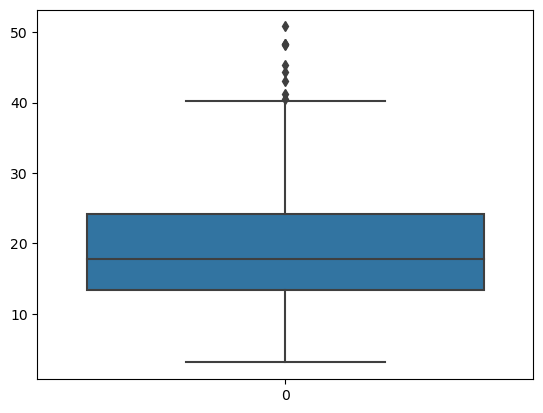

In [388]:
sns.boxplot(df['total_bill'])

In [389]:
### Tip column

In [390]:
df['tip'].describe()

count    243.000000
mean       3.002387
std        1.385002
min        1.000000
25%        2.000000
50%        2.920000
75%        3.575000
max       10.000000
Name: tip, dtype: float64

<AxesSubplot: >

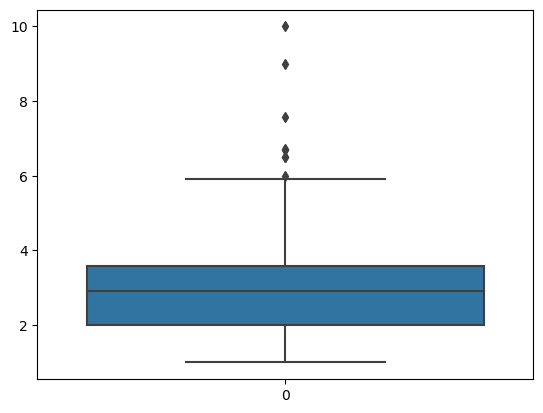

In [391]:
sns.boxplot(df['tip'])

In [392]:
### Sex

In [393]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [394]:
df['sex'].value_counts()

Male      157
Female     86
Name: sex, dtype: int64

In [395]:
df['sex'].describe()


count      243
unique       2
top       Male
freq       157
Name: sex, dtype: object

<AxesSubplot: xlabel='sex', ylabel='count'>

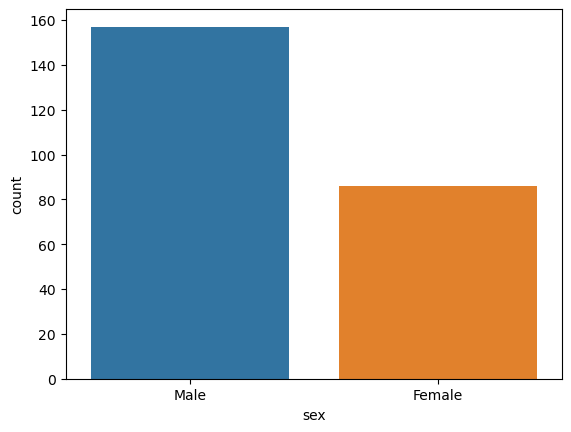

In [396]:
sns.countplot(x=df['sex'])

In [397]:
### Smoker column

In [398]:
df['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [399]:
df['sex'].value_counts()

Male      157
Female     86
Name: sex, dtype: int64

In [400]:
df['sex'].describe()

count      243
unique       2
top       Male
freq       157
Name: sex, dtype: object

<AxesSubplot: xlabel='smoker', ylabel='count'>

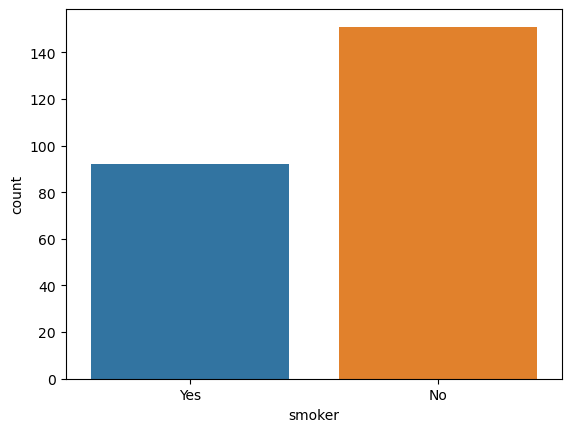

In [401]:
sns.countplot(x=df['smoker'])

In [402]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [403]:
### Day Column

In [404]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [405]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    61
Fri     19
Name: day, dtype: int64

In [406]:
df['sex'].describe()

count      243
unique       2
top       Male
freq       157
Name: sex, dtype: object

<AxesSubplot: xlabel='day', ylabel='count'>

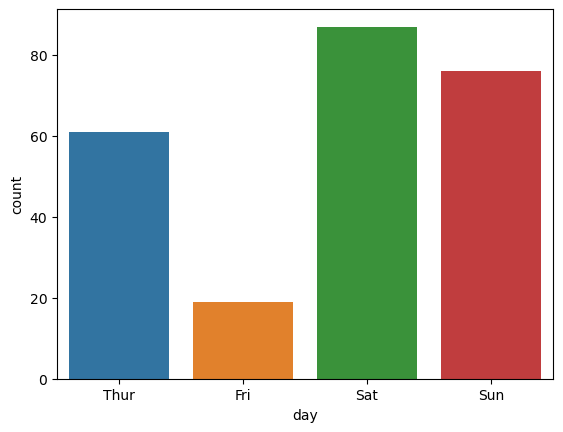

In [407]:
sns.countplot(x=df['day'])

In [408]:
### Size column

In [409]:
df['size'].describe()

count    243.000000
mean       2.572016
std        0.952356
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

<AxesSubplot: >

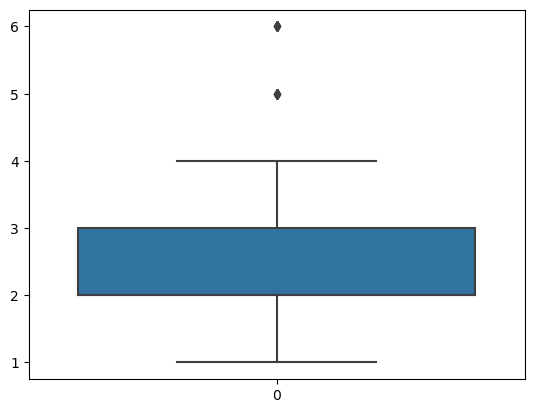

In [410]:
sns.boxplot(df['size'])

In [411]:
# Time column

In [412]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [413]:
df['time'].value_counts()

Dinner    176
Lunch      67
Name: time, dtype: int64

In [414]:
df['time'].describe()

count        243
unique         2
top       Dinner
freq         176
Name: time, dtype: object

<AxesSubplot: xlabel='time', ylabel='count'>

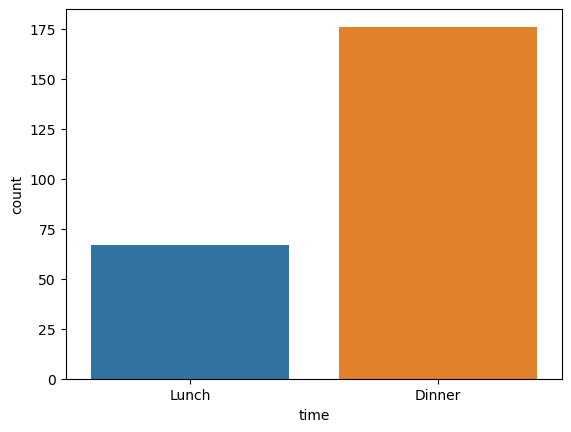

In [415]:
sns.countplot(x=df['time'])

### Note
- EDA can't be automated
- We can use various libraries for automating
  - Handling Missing Values
  - handling Categorical features
  - handling outliers
  - Feature scaling
  - Automating the entire

### Encoding categorical output

In [416]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['time']=encoder.fit_transform(df['time'])

### Split train and test data

In [417]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [418]:
from sklearn.impute import SimpleImputer ## Handling Missing Values
from sklearn.preprocessing import OneHotEncoder## handling Categorical features
from sklearn.preprocessing import StandardScaler## Feature scaling
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
## Automating the entire

### For above the data encoding technique can be changed here we don't 
- have any rank so we are using one hot endcoding but in case of 
- income classes like rich middle etc we will use ordinal encoding
- as per requirement and depending we will use this encoding technique

In [419]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time             int64
size             int64
dtype: object

In [420]:
categorical_cols = ['sex', 'smoker','day']
numerical_cols = ['total_bill', 'tip','size']

In [421]:
## Feature Engineering Automation

#non-categorical Pipeline
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')), ##missing values
        ('scaler',StandardScaler())## feature scaling 
    ]

)

#categorical Pipeline
cat_pipeline=Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')), ## handling Missing values
                ('onehotencoder',OneHotEncoder()) ## Categorical features to numerical
                ]

            )  


In [422]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)

])

In [423]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [424]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [425]:
## Automate Model Training Process
models={
    'Random Forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'SVC':SVC()

}

In [426]:
from sklearn.metrics import accuracy_score

In [427]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)

            

        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get accuracy for test data prediction
       
        test_model_score = accuracy_score(y_test,y_test_pred)

        report[list(models.keys())[i]] =  test_model_score
            

            
    return report

In [428]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': 0.9795918367346939,
 'Decision Tree': 0.9795918367346939,
 'SVC': 1.0}

In [429]:
classifier=RandomForestClassifier()

In [430]:
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [434]:
y_pred=classifier.predict(X_test)

In [435]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score*100)
print(classification_report(y_pred,y_test))

97.95918367346938
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.88      0.93         8

    accuracy                           0.98        49
   macro avg       0.99      0.94      0.96        49
weighted avg       0.98      0.98      0.98        49



In [436]:
## Hypeparameter Tuning
params={'max_depth':[3,5,10,None],
              'n_estimators':[100,200,300],
               'criterion':['gini','entropy']
              }

In [437]:
from sklearn.model_selection import RandomizedSearchCV

In [438]:
cv=RandomizedSearchCV(classifier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.974 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.949 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.949 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.923 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.947 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.974 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.949 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.949 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.923 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.921 total time=   0.2s
[CV 1/5] END criter

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [439]:
cv.best_params_

{'n_estimators': 200, 'max_depth': 3, 'criterion': 'gini'}

In [440]:
y_pred=cv.predict(X_test)

In [441]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score*100)
print(classification_report(y_pred,y_test))

100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00         7

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49

